In [1]:
from single_sqrb import Single_SQRB_Experiment
from selene_sim import DepolarizingErrorModel, Stim

In [2]:
# select parameters and build experiment

n_qubits = 8
seq_lengths = [6, 24]
seq_reps = 10
filename = 'exp_single_SQRB_example.p'
qubit_length_groups = {
    0: 1,
    1: 1,
    2: 2,
    3: 2,
    4: 3,
    5: 3,
    6: 6,
    7: 6
}
interleave_operation = 'transport'

exp = Single_SQRB_Experiment(
    n_qubits, 
    seq_lengths, 
    seq_reps, 
    qubit_length_groups,
    interleave_operation,
    filename=filename
)
exp.add_settings()

### Run local simulation using Selene

In [8]:
# Setup error model

error_model = DepolarizingErrorModel(
    random_seed=1234,
    # single qubit gate error rate
    p_1q=1e-4,
    # two qubit gate error rate
    p_2q=1e-2,
    # set state preparation and measurement error rates to 0
    p_meas=0,
    p_init=0,
)

In [9]:
# simulate experiment

shots = 100
simulator = Stim()

exp.sim(shots, error_model=error_model, simulator=simulator)

Simulating ...
1/20 circuits complete
2/20 circuits complete
3/20 circuits complete
4/20 circuits complete
5/20 circuits complete
6/20 circuits complete
7/20 circuits complete
8/20 circuits complete
9/20 circuits complete
10/20 circuits complete
11/20 circuits complete
12/20 circuits complete
13/20 circuits complete
14/20 circuits complete
15/20 circuits complete
16/20 circuits complete
17/20 circuits complete
18/20 circuits complete
19/20 circuits complete
20/20 circuits complete


### Submit to Quantinuum Hardware or Emulator backend using Nexus

In [4]:
# Choose domain and login to Nexus

import qnexus
from qnexus.config import CONFIG

CONFIG.domain = "qa.myqos.com"
qnexus.login()

🌐 Browser log in initiated.


╭────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                        │
│         Confirm that the browser shows the following code and click 'allow device':    │
│                                                                                        │
│                                      IiNN8k                                            │
│                                                                                        │
╰────────────────────────────────────────────────────────────────────────────────────────╯

Browser didn't open automatically? Use this link: https://qa.myqos.com/auth/device/browser?otp=IiNN8k7nzlvN4I4UzM-DtZlqtxRzCkkAWjNp6wRSSdncTG_MkrkjTtHEbxRDHXD5f9GYiy4tL3foAZ-1uQEJuA
✅ Successfully logged in as charles.baldwin@quantinuum.com using the browser.


In [10]:
# choose nexus project and setup quantinuum backend config

project = qnexus.projects.get_or_create(name='transport-single-SQRB-example-project')
qnexus.context.set_active_project(project)

backend_config = qnexus.QuantinuumConfig(device_name='Helios-1E', simulator='Stim')

In [11]:
# submit experiment. Returns a qnexus ExecuteJobRef

shots = 100

execute_job_ref = exp.submit(shots, backend_config)

In [13]:
# inspect status of the execution job

qnexus.jobs.status(execute_job_ref)

JobStatus(status=<StatusEnum.ERROR: 'Circuit has errored. Check CircuitStatus.message for error message.'>, message='Circuit has encountered an error.', error_detail="<class 'RuntimeError'>: unknown variant `Extensions`, expected one of `Type`, `BoundedNat`, `String`, `Sequence`, `Variable`\n\nCaused by:\n    0: unknown variant `Extensions`, expected one of `Type`, `BoundedNat`, `String`, `Sequence`, `Variable`\n    1: unknown variant `Extensions`, expected one of `Type`, `BoundedNat`, `String`, `Sequence`, `Variable`", completed_time=None, queued_time=None, submitted_time=datetime.datetime(2025, 6, 12, 16, 43, 3, 909308, tzinfo=datetime.timezone.utc), running_time=None, cancelled_time=None, error_time=datetime.datetime(2025, 6, 12, 16, 43, 4, 571376, tzinfo=datetime.timezone.utc), queue_position=None)

In [ ]:
# retrieve results (once execution job has completed)

exp.retrieve(execute_job_ref)

/Users/charles.baldwin/Documents/GitHub/circuit-benchmarks-guppy/single_sqrb.py:465: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(fit_func, x, y, p0=[0.4, 0.9], bounds=([0,0], [0.5,1]))
/Users/charles.baldwin/Documents/GitHub/circuit-benchmarks-guppy/single_sqrb.py:337: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(fit_func, x, y, p0=[0.4, 0.9], bounds=([0,0], [0.5,1]))


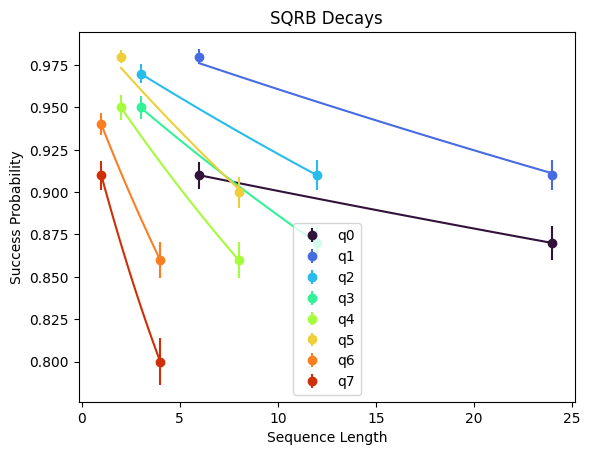

Average Fidelities
------------------------------
qubit 0: 0.997157 +/- 0.000872
qubit 1: 0.995939 +/- 0.000471
qubit 2: 0.99247 +/- 0.001224
qubit 3: 0.989243 +/- 0.001746
qubit 4: 0.981746 +/- 0.002504
qubit 5: 0.986539 +/- 0.001331
qubit 6: 0.967649 +/- 0.005259
qubit 7: 0.950556 +/- 0.007581
------------------------------
Qubit length 1 Average: 0.996548 +/- 0.000496
Qubit length 2 Average: 0.990856 +/- 0.001066
Qubit length 3 Average: 0.984143 +/- 0.001418
Qubit length 6 Average: 0.959103 +/- 0.004613


NameError: name 'github_save' is not defined

In [11]:
exp.analyze_results()

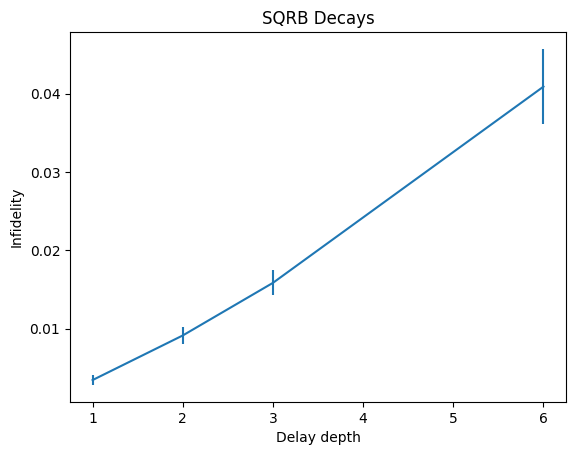

In [13]:
exp.plot_scaling()

In [14]:
# save experiment object to working directory

exp.save()